In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("auto-mpg.csv")

In [7]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


# Part 1: Data Exploration and Preprocessing (40 points, 1 hour)

## Task 1.1: Explore the Data (15 points)

### 1. (5 points) Display the first 5 rows of X and the first 5 values of y.

In [9]:
X = df.drop('mpg', axis=1)

In [10]:
y = df['mpg']

In [14]:
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,8,302.0,140,3449,10.5,70,1,ford torino


In [15]:
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

### 2. (5 points) Print the summary statistics (mean, std, min, max) for all numeric features in X using describe().

In [17]:
X.describe()

,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


### 3. (5 points) Create a histogram of the target variable (mpg) using matplotlib or seaborn. Add a title (“MPG Distribution”) and labels for the axes (x: “Miles per Gallon”, y: “Frequency”).

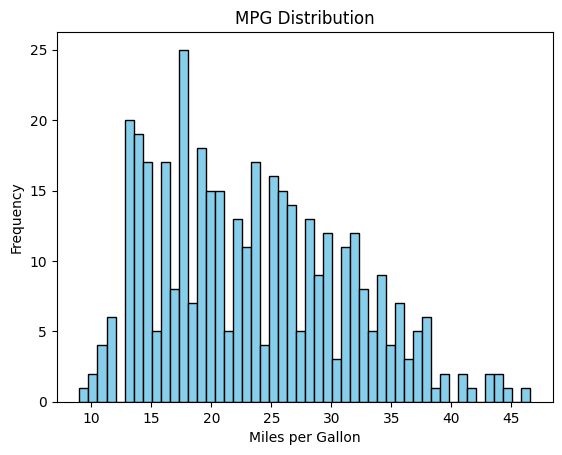

In [22]:
plt.hist(y, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Miles per Gallon')
plt.ylabel('Frequency')
plt.title('MPG Distribution')
plt.show()

## Task 1.2: Handle Data Issues (15 points)

### 1. (5 points) Check for missing values in X and y. Print the number of missing values for each column. For horsepower (which has missing values), impute missing values with the median of the horsepower column.

In [27]:
x_mv = X.isnull().sum()
x_mv

cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [28]:
y_mv = y.isnull().sum()
y_mv

np.int64(0)

There are no missing values so there is no need to replace them

### 2. (5 points) Create a boxplot for the weight feature to check for outliers. Save or display the plot with the title “Boxplot of Weight”.

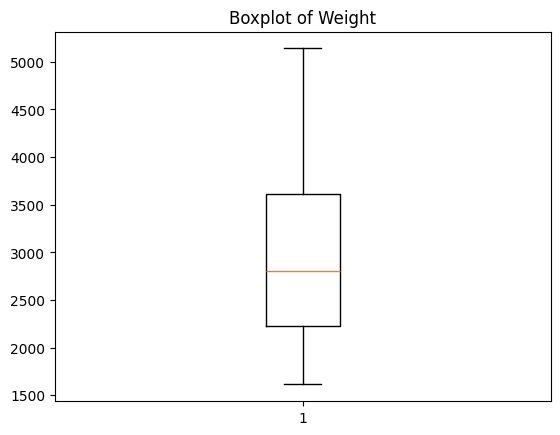

In [30]:
plt.boxplot(X['weight'])
plt.title('Boxplot of Weight')
plt.show()

### 3. (5 points) Convert the categorical feature origin (values: 'usa', 'japan', 'europe') into numeric values using one-hot encoding with pd.get_dummies(). Add these encoded columns to X and drop the original origin column.

There is no US, Japan or Europe in the dataset

## Task 1.3: Visualize Relationships (10 points)

### 1. (10 points) Create a scatter plot of horsepower (x-axis) vs. mpg (y-axis). Add a title (“Horsepower vs. MPG”) and labels (x: “Horsepower”, y: “MPG”). Comment in your code whether you see a relationship (e.g., positive, negative, or none).

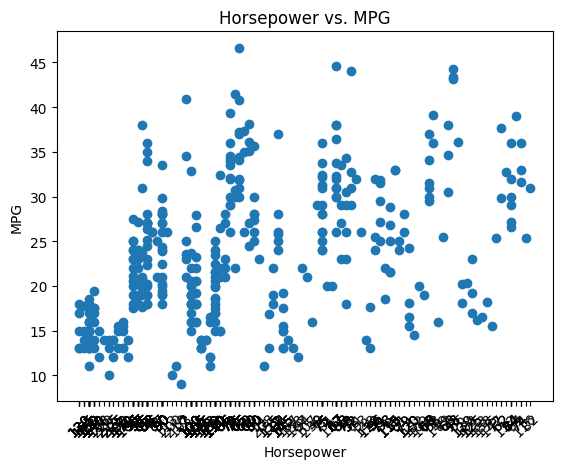

In [46]:
plt.scatter(X['horsepower'], y)
plt.title('Horsepower vs. MPG')
plt.xticks(X['horsepower'], rotation=45)
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.show()
# It seems that there is a positive correlation if one factor increases then the other one is also increases

# Part 2: Build and Evaluate a Linear Regression Model (40 points, 1 hour)

### 1. (15 points) Split X and y into training (80%) and testing (20%) sets using train_test_split with random_state=42. Print the shapes of X_train, X_test, y_train, and y_test.

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (318, 8)
X_test shape: (80, 8)
y_train shape: (318,)
y_test shape: (80,)


## Task 2.2: Train and Evaluate Model (25 points)

### 1. (10 points) Train a LinearRegression model on the training data (X_train, y_train).

In [65]:
X['horsepower'] = X['horsepower'].replace('?', pd.NA)

X['horsepower'] = pd.to_numeric(X['horsepower'], errors='coerce')

hp_median = X['horsepower'].median()

X['horsepower'] = X['horsepower'].fillna(hp_median)

X = X.drop(columns=['car name'], errors='ignore')

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### 2. (10 points) Make predictions on the test set (X_test). Calculate and print the Mean Squared Error (MSE) and R2 score for the test set.

In [70]:
y_pred = model.predict(X_test)

In [72]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 8.197746885824992
R-squared: 0.8475304239212401


### 3. (5 points) Create a scatter plot of actual vs. predicted mpg values for the test set. Add a diagonal line (y=x) with plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') to show perfect predictions. Include a title (“Actual vs. Predicted MPG”) and labels.

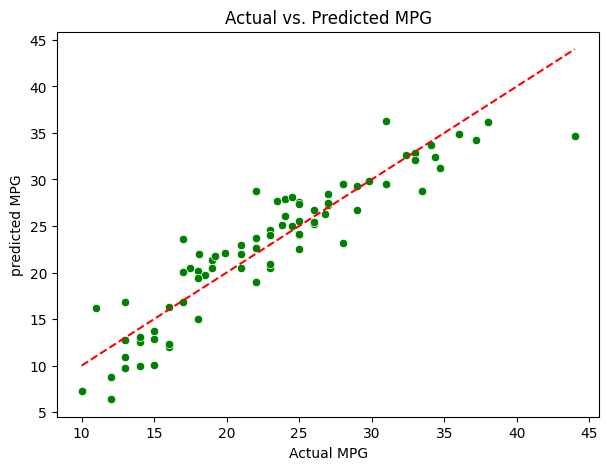

In [73]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred, color='green')
plt.xlabel('Actual MPG')
plt.ylabel('predicted MPG')
plt.title('Actual vs. Predicted MPG')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

# Part 3: Feature Engineering and Model Improvement (20 points, 1 hour)

## Task 3.1: Feature Engineering (10 points)

### 1. (10 points) Create a new feature called weight_per_cylinder by dividing weight by cylinders. Standardize this new feature and add it to X_scaled. Retrain the LinearRegression model on the updated training data and report the new MSE and R2 score on the test set.

In [75]:
X['weight_per_cylinder'] = X['weight']/X['cylinders']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [79]:
y_pred = model.predict(X_test)

In [80]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-Squared:", r2)

Mean Squared Error: 7.3545291510481245
R-Squared: 0.8632133978351856


## Task 3.2: Try Another Model (10 points)

### 1. (10 points) Train a Ridge regression model (from sklearn.linear_model import Ridge) with alpha=1.0 on the updated training data (including weight_per_cylinder). Calculate and print the MSE and R2 score on the test set. Comment in your code whether the Ridge model performs better or worse than the Linear Regression model from Task 3.1.

In [82]:
from sklearn.linear_model import Ridge

In [83]:
ridge_model = Ridge(alpha=1.0)

ridge_model.fit(X_train, y_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [84]:
y_pred_ridge = ridge_model.predict(X_test)

In [86]:
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression - Mean Squared Error:", mse_ridge)
print("Ridge Regression - R-squared:", r2_ridge)

Ridge Regression - Mean Squared Error: 7.378836507504454
Ridge Regression - R-squared: 0.8627613062561079


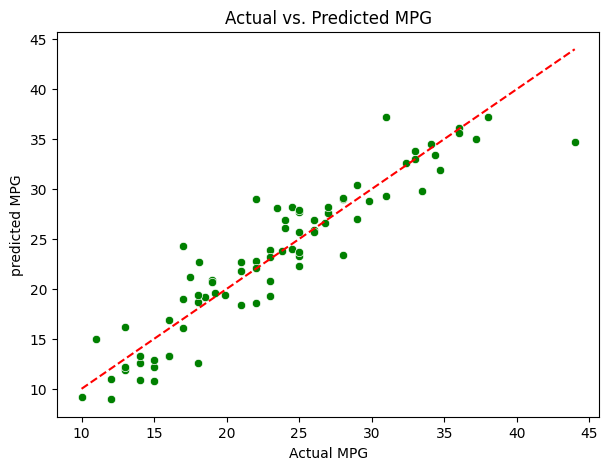

In [88]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred, color='green')
plt.xlabel('Actual MPG')
plt.ylabel('predicted MPG')
plt.title('Actual vs. Predicted MPG')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

# Ridge performed better then linear regression